#### Background

 ***   
 Sendy is the delivery partner for moving packages in Kenya. Sendy provides an app and web platform that enables (small) businesses to connect with drivers and request ondemand or scheduled package delivery services anytime, any day, 24/7. Partnership is the foundation of what we do. 
By partnering with Drivers and Businesses, we empower individuals to grow their livelihood. We do this by building a platform that is simple, transparent, and user Centric. Our goal is to be the preferred delivery partner in Africa.
 ***   

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Case Study.xlsx", sheet_name ="Querry resultt")
df.head()

,S/N,Personal or Business,Business Number,Vehicle Type,Standard or Express,Platform,Cancel Reason,Cancelled by,Placement Day,Placement Time,Placement time t,Confirmation Day,confirmation Time2,Cancellation Day,cancellation Time T,Cancellation Time,Distance (KM),Pickup Lat,Pickup Long,scheduled
0,1,Personal,NaN,Bike,Express,android,No driver has been allocated to my request.,Customer,Monday,5:55PM,17,NaN,NaN,Monday,17,5:56PM,9,-1.313053,36.841437,OnDemAND
1,2,Personal,NaN,Bike,Express,android,My order is not ready.,Customer,Monday,12:26PM,12,Monday,12:27PM,Monday,12,12:28PM,14,-1.318959,36.853394,OnDemAND
2,3,Business,20680.0,Bike,Express,android,I placed the wrong locations.,Customer,Monday,1:21PM,13,Monday,1:21PM,Monday,13,1:47PM,16,-1.313854,36.706867,OnDemAND
3,4,Personal,NaN,Bike,Express,android,My order is not ready.,Customer,Monday,10:29AM,10,NaN,NaN,Monday,10,10:29AM,20,-1.206197,36.778776,OnDemAND
4,5,Personal,NaN,Bike,Standard,ios,No Partner,Staff,Monday,2:34PM,14,Monday,2:59PM,Monday,15,3:49PM,11,-1.296958,36.808166,OnDemAND


In [3]:
#df.describe()

In [4]:
#df.dtypes

 ***   
 #### Question: 
Analyse the order cancellations and visualize the most important aspects using your preferred method. Document your steps if needed. Furthermore, recommend how to reduce the number of cancelled orders. 
 ***   

In [5]:
df["Cancelled by"].value_counts()

Customer    4697
Staff       1701
Name: Cancelled by, dtype: int64

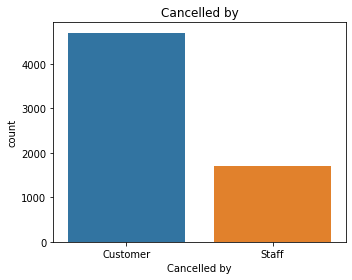

In [6]:
figure,ax=plt.subplots(figsize=(5,4))

sns.countplot(x='Cancelled by',data=df,ax=ax)
ax.set_title('Cancelled by')

plt.tight_layout()

#### Observation; 
Orders are cancelled more by Customers

In [7]:
df["Cancel Reason"].value_counts()

No driver has been allocated to my request.    1775
No Partner                                     1293
My order is not ready.                         1214
I placed the wrong locations.                  1114
The driver is too far away.                     594
Customer error                                  337
Delay                                            71
Name: Cancel Reason, dtype: int64

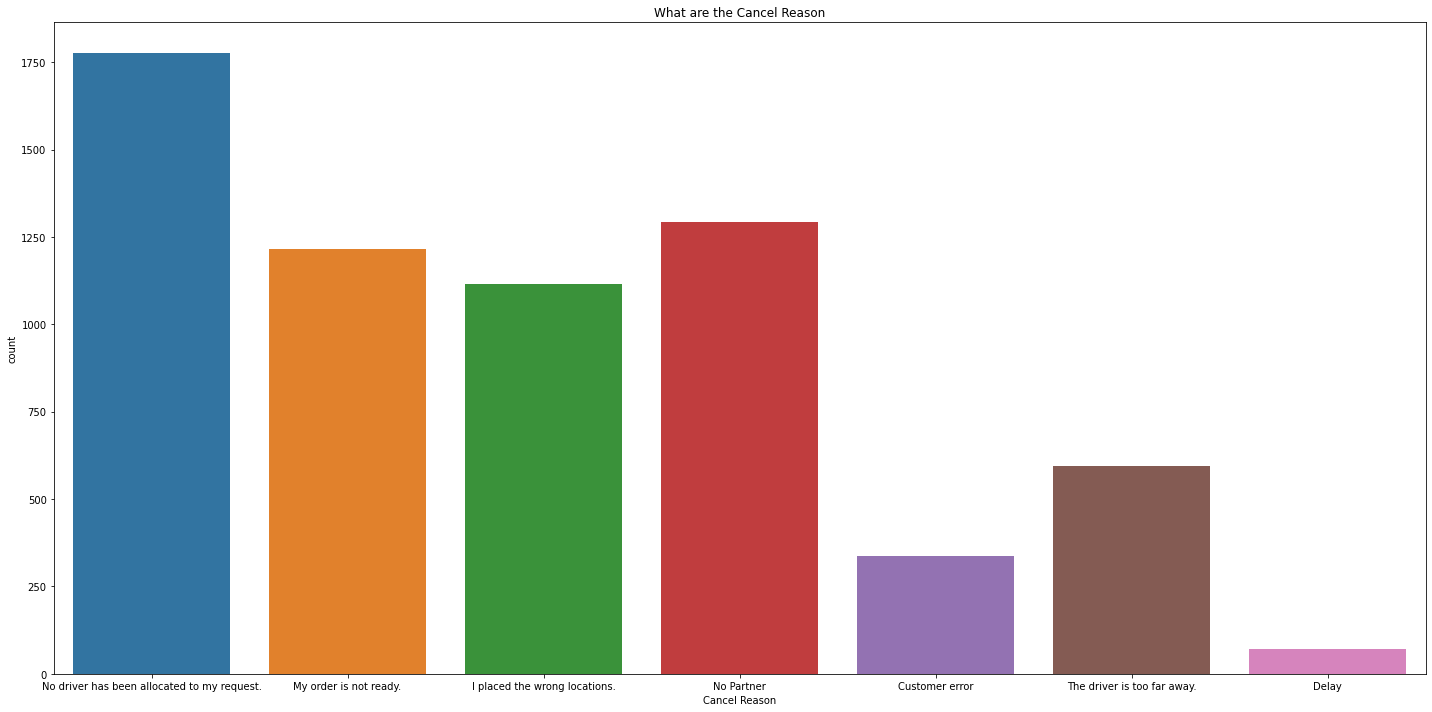

In [8]:
figure,ax=plt.subplots(figsize=(20,10))

sns.countplot(x='Cancel Reason',data=df,ax=ax)
ax.set_title('What are the Cancel Reason')

plt.tight_layout()

#### Observation;
"No driver has been allocated to my request","No Partner" and, "My order is not ready" are the top 3 reasons for cancellation. Hypothesis: This could be due to the availability of drivers on the app.

These are followed by "I placed the wrong locations", "The driver is too far away", "Customer error" and, "Delay". 
Hypothesis: The number of drivers to passeneger ratio should be looked at.

In [9]:
df["Cancellation Day"].value_counts()

Friday       1308
Thursday     1188
Wednesday    1056
Tuesday      1045
Monday        832
Saturday      661
Sunday        308
Name: Cancellation Day, dtype: int64

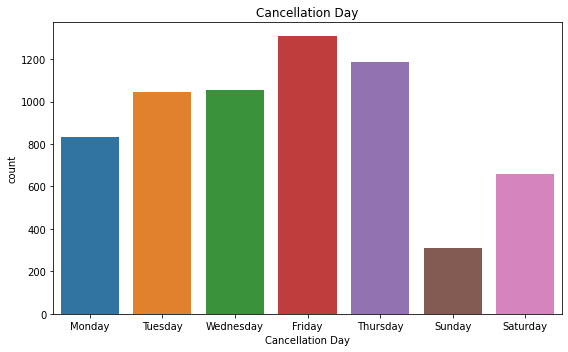

In [10]:
figure,ax=plt.subplots(figsize=(8,5))

sns.countplot(x='Cancellation Day',data=df,ax=ax)
ax.set_title('Cancellation Day')

plt.tight_layout()

#### Observation; 
The most cancellation day is Friday followed closely by Thursday, wednesday and Tuesday

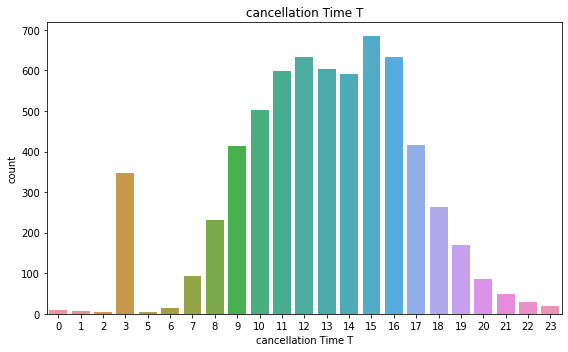

In [11]:
figure,ax=plt.subplots(figsize=(8,5))

sns.countplot(x='cancellation Time T',data=df,ax=ax)
ax.set_title('cancellation Time T')

plt.tight_layout()

#### Observation; 
The most cancellation Time by hours is 3pm followed by 4pm. 
However Cancellation generally picks from 10am to 5pm

In [12]:
df_Friday = df[df["Cancellation Day"]=="Friday"].reset_index(drop=True)

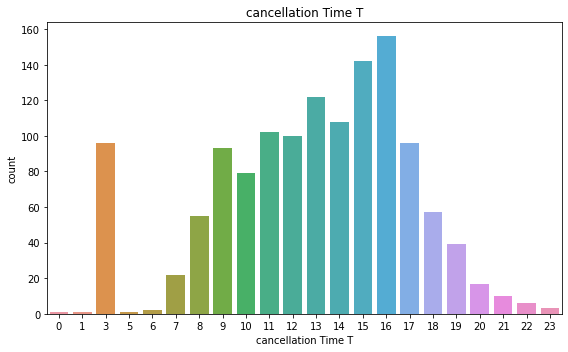

In [13]:
figure,ax=plt.subplots(figsize=(8,5))

sns.countplot(x='cancellation Time T',data=df_Friday,ax=ax)
ax.set_title('cancellation Time T')

plt.tight_layout()

In [14]:
df_Friday["Cancel Reason"].value_counts()

No driver has been allocated to my request.    360
No Partner                                     271
My order is not ready.                         223
I placed the wrong locations.                  222
Customer error                                 111
The driver is too far away.                    104
Delay                                           17
Name: Cancel Reason, dtype: int64

#### Observation; 
We noticed Friday had the most cancelled day; hence i decided to explore it.
The most cancellation Time by hours on friday is 4pm followed by 3pm. 
However from an 100 count, Cancellation generally picks from 11am to 5pm

for the reasons on friday, "No driver has been allocated to my request", "No Partner" and "My order is not ready" are the top 3 reason.

In [15]:
df_Thursday = df[df["Cancellation Day"]=="Thursday"].reset_index(drop=True)

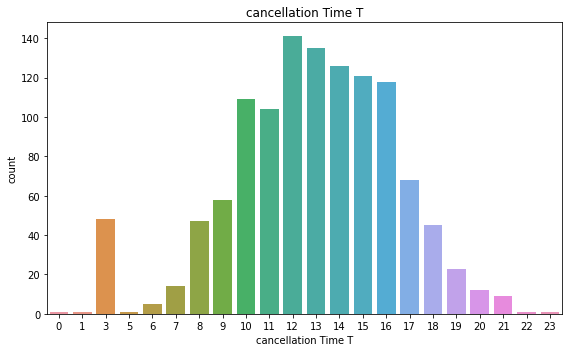

In [16]:
figure,ax=plt.subplots(figsize=(8,5))

sns.countplot(x='cancellation Time T',data=df_Thursday,ax=ax)
ax.set_title('cancellation Time T')

plt.tight_layout()

In [17]:
df_Thursday["Cancel Reason"].value_counts()

No driver has been allocated to my request.    293
No Partner                                     243
I placed the wrong locations.                  231
My order is not ready.                         229
The driver is too far away.                    120
Customer error                                  63
Delay                                            9
Name: Cancel Reason, dtype: int64

#### Observation; 
We noticed Thurdsday was the next most cancelled day right after Friday; hence i decided to explore it.
The most cancellation Time by hours on Thursday is 12pm followed by 1pm. 
However from an 100 count, Cancellation generally picks from 10am to 4pm

for the reasons on friday, "No driver has been allocated to my request", "No Partner" and "I placed the wrong locations." are the top 3 reason.

#### Looking back at the cancelled reason 

In [18]:
pd.pivot_table(df,index=['Cancelled by','Cancel Reason'], values =['S/N'], aggfunc=lambda x: len(x.unique()))

S/N
Cancelled by Cancel Reason                                    
Customer     I placed the wrong locations.                1114
             My order is not ready.                       1214
             No driver has been allocated to my request.  1775
             The driver is too far away.                   594
Staff        Customer error                                337
             Delay                                          71
             No Partner                                   1293

#### Observation;
"No driver has been allocated to my request","No Partner", "I placed the wrong locations" and, "My order is not ready" are the top 4 reasons for cancellation. 

Looking at this;    
1. **By customers;** "No driver has been allocated to my request", "I placed the wrong locations" and, "My order is not ready" are the top 3 reasons for cancellation. 

**Hypothesis:** 
* The app do not have enough drivers to handle its customer ratio. This is seen in the "The driver is too far away"
* The "I placed the wrong locations" could be due to the UI and UX of the app.
 ***        
2. **By Staff;** When we looked at the "No Partner" and "Customer error"

**Hypothesis:**
* "Customer error" is related to the "I placed the wrong locations"
* "No partner" on the other hand could be a result of potential or customers ditchingthe app for other servies. 
***      
**Suggestion:** 
* We need more drivers on board.
* The UI/UX should be looked into.
***   